# <center> Machine Learning for Stock Direction Prediction on AAPL </center>
## <center> Intro to Machine Learning </center>
### <center> Caleb McAnuff </center>

In [475]:
import configparser
c = configparser.ConfigParser()
c.read("config.cfg")

['config.cfg']

In [476]:
from alpaca.data.historical import StockHistoricalDataClient
# from alpaca.data.requests import Stock
secret_key = c['alpaca']['SecretKey']
api_key = c['alpaca']['ApiKey']
endpoint = "https://paper-api.alpaca.markets"

In [477]:
client = StockHistoricalDataClient(api_key, secret_key)

In [478]:
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockLatestQuoteRequest

# keys required for stock historical data client
client = StockHistoricalDataClient(api_key,secret_key)

# multi symbol request - single symbol is similar
multisymbol_request_params = StockLatestQuoteRequest(symbol_or_symbols=["SPY", "GLD", "TLT"])

latest_multisymbol_quotes = client.get_stock_latest_quote(multisymbol_request_params)

gld_latest_ask_price = latest_multisymbol_quotes["GLD"].ask_price

In [479]:
latest_multisymbol_quotes

{'TLT': {   'ask_exchange': 'V',
     'ask_price': 106.75,
     'ask_size': 1.0,
     'bid_exchange': 'V',
     'bid_price': 106.55,
     'bid_size': 1.0,
     'conditions': ['R'],
     'symbol': 'TLT',
     'tape': 'C',
     'timestamp': datetime.datetime(2022, 12, 9, 21, 58, 7, 168871, tzinfo=datetime.timezone.utc)},
 'GLD': {   'ask_exchange': 'V',
     'ask_price': 167.19,
     'ask_size': 3.0,
     'bid_exchange': 'V',
     'bid_price': 167.07,
     'bid_size': 3.0,
     'conditions': ['R'],
     'symbol': 'GLD',
     'tape': 'B',
     'timestamp': datetime.datetime(2022, 12, 9, 21, 9, 40, 570069, tzinfo=datetime.timezone.utc)},
 'SPY': {   'ask_exchange': 'V',
     'ask_price': 393.35,
     'ask_size': 6.0,
     'bid_exchange': 'V',
     'bid_price': 393.33,
     'bid_size': 1.0,
     'conditions': ['R'],
     'symbol': 'SPY',
     'tape': 'B',
     'timestamp': datetime.datetime(2022, 12, 9, 21, 21, 22, 770094, tzinfo=datetime.timezone.utc)}}

In [480]:
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
import datetime

client = StockHistoricalDataClient(api_key, secret_key)
start = datetime.datetime.strptime("November 11, 2017", "%B %d, %Y") # "2022-07-01"
end = datetime.datetime.strptime("November 11, 2022", "%B %d, %Y") # "2022-11-01"

request_params = StockBarsRequest(
                        symbol_or_symbols="AAPL",#, "VAXX"],
                        timeframe=TimeFrame.Day,
                        start=start
                 )

bars = client.get_stock_bars(request_params)

In [481]:
bars.df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1278 entries, ('AAPL', Timestamp('2017-11-13 05:00:00+0000', tz='UTC')) to ('AAPL', Timestamp('2022-12-09 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         1278 non-null   float64
 1   high         1278 non-null   float64
 2   low          1278 non-null   float64
 3   close        1278 non-null   float64
 4   volume       1278 non-null   float64
 5   trade_count  1278 non-null   float64
 6   vwap         1278 non-null   float64
dtypes: float64(7)
memory usage: 116.1+ KB


Text(0, 0.5, 'Price')

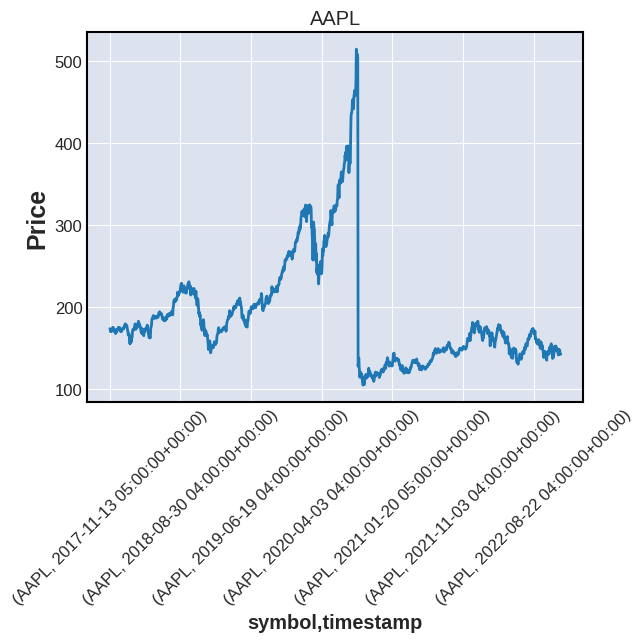

In [482]:
import pandas as pd
import matplotlib.pyplot as plt
bars.df['open'].plot()
plt.title('AAPL')
plt.xticks(rotation=45)
plt.ylabel('Price', fontsize=18)

In [483]:
import mplfinance as mpf
aapl1 = bars.df.droplevel(0) # symbol name of the multiindex

In [484]:
aapl1.to_csv('aapl.csv')

In [485]:
aapl = pd.read_csv('aapl.csv')

In [486]:
import numpy as np

Text(0.5, 1.0, 'AAPL Daily Price')

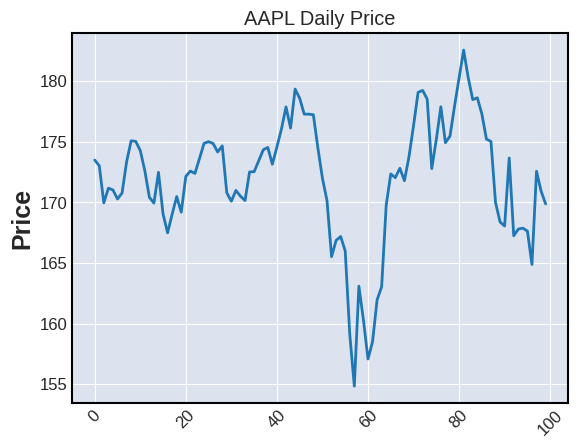

In [487]:
subset = 100
aapl['open'][:subset].plot()
plt.xticks(rotation=45)
plt.ylabel('Price', fontsize=18)
plt.title("AAPL Daily Price")

Text(0.5, 1.0, '(OHLC) AAPL Daily Chart')

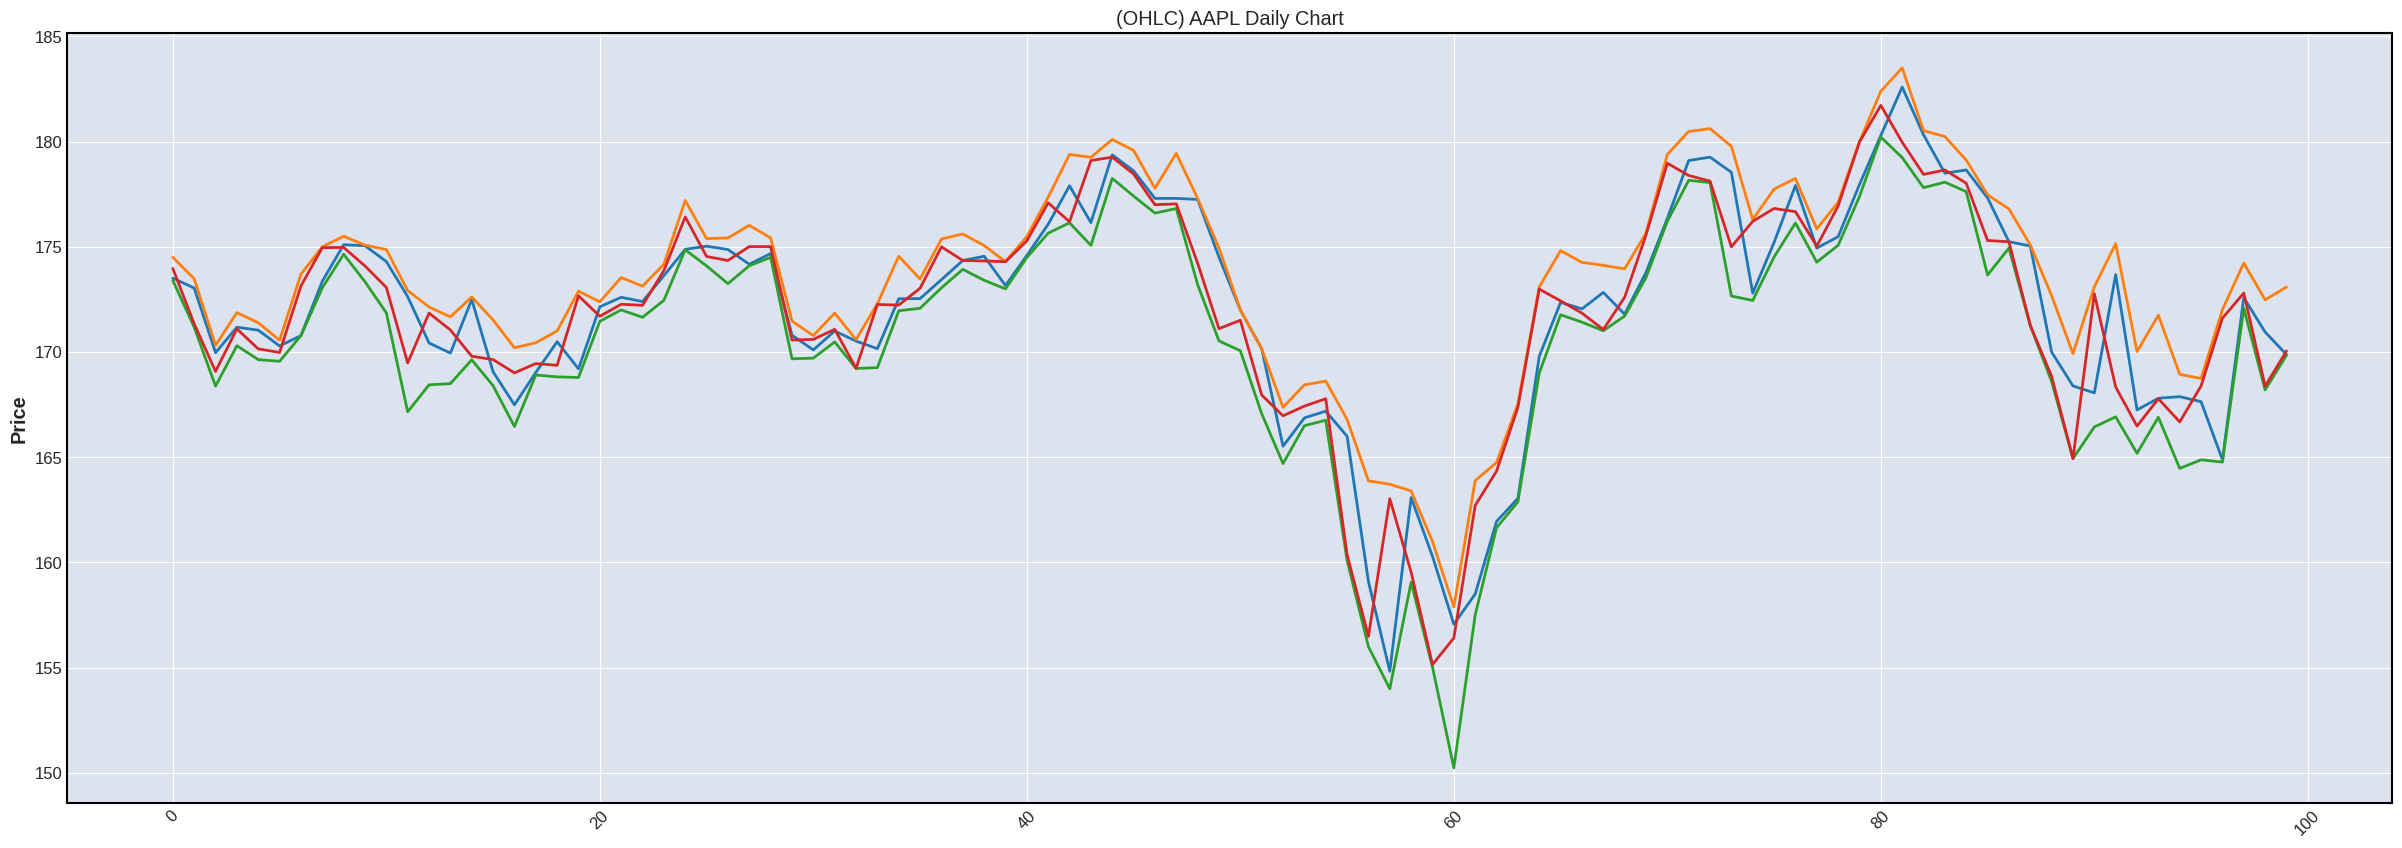

In [488]:
plt.figure(figsize=(30,10))
aapl['open'][:subset].plot()
aapl['high'][:subset].plot()
aapl['low'][:subset].plot()
aapl['close'][:subset].plot()
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.title('(OHLC) AAPL Daily Chart')


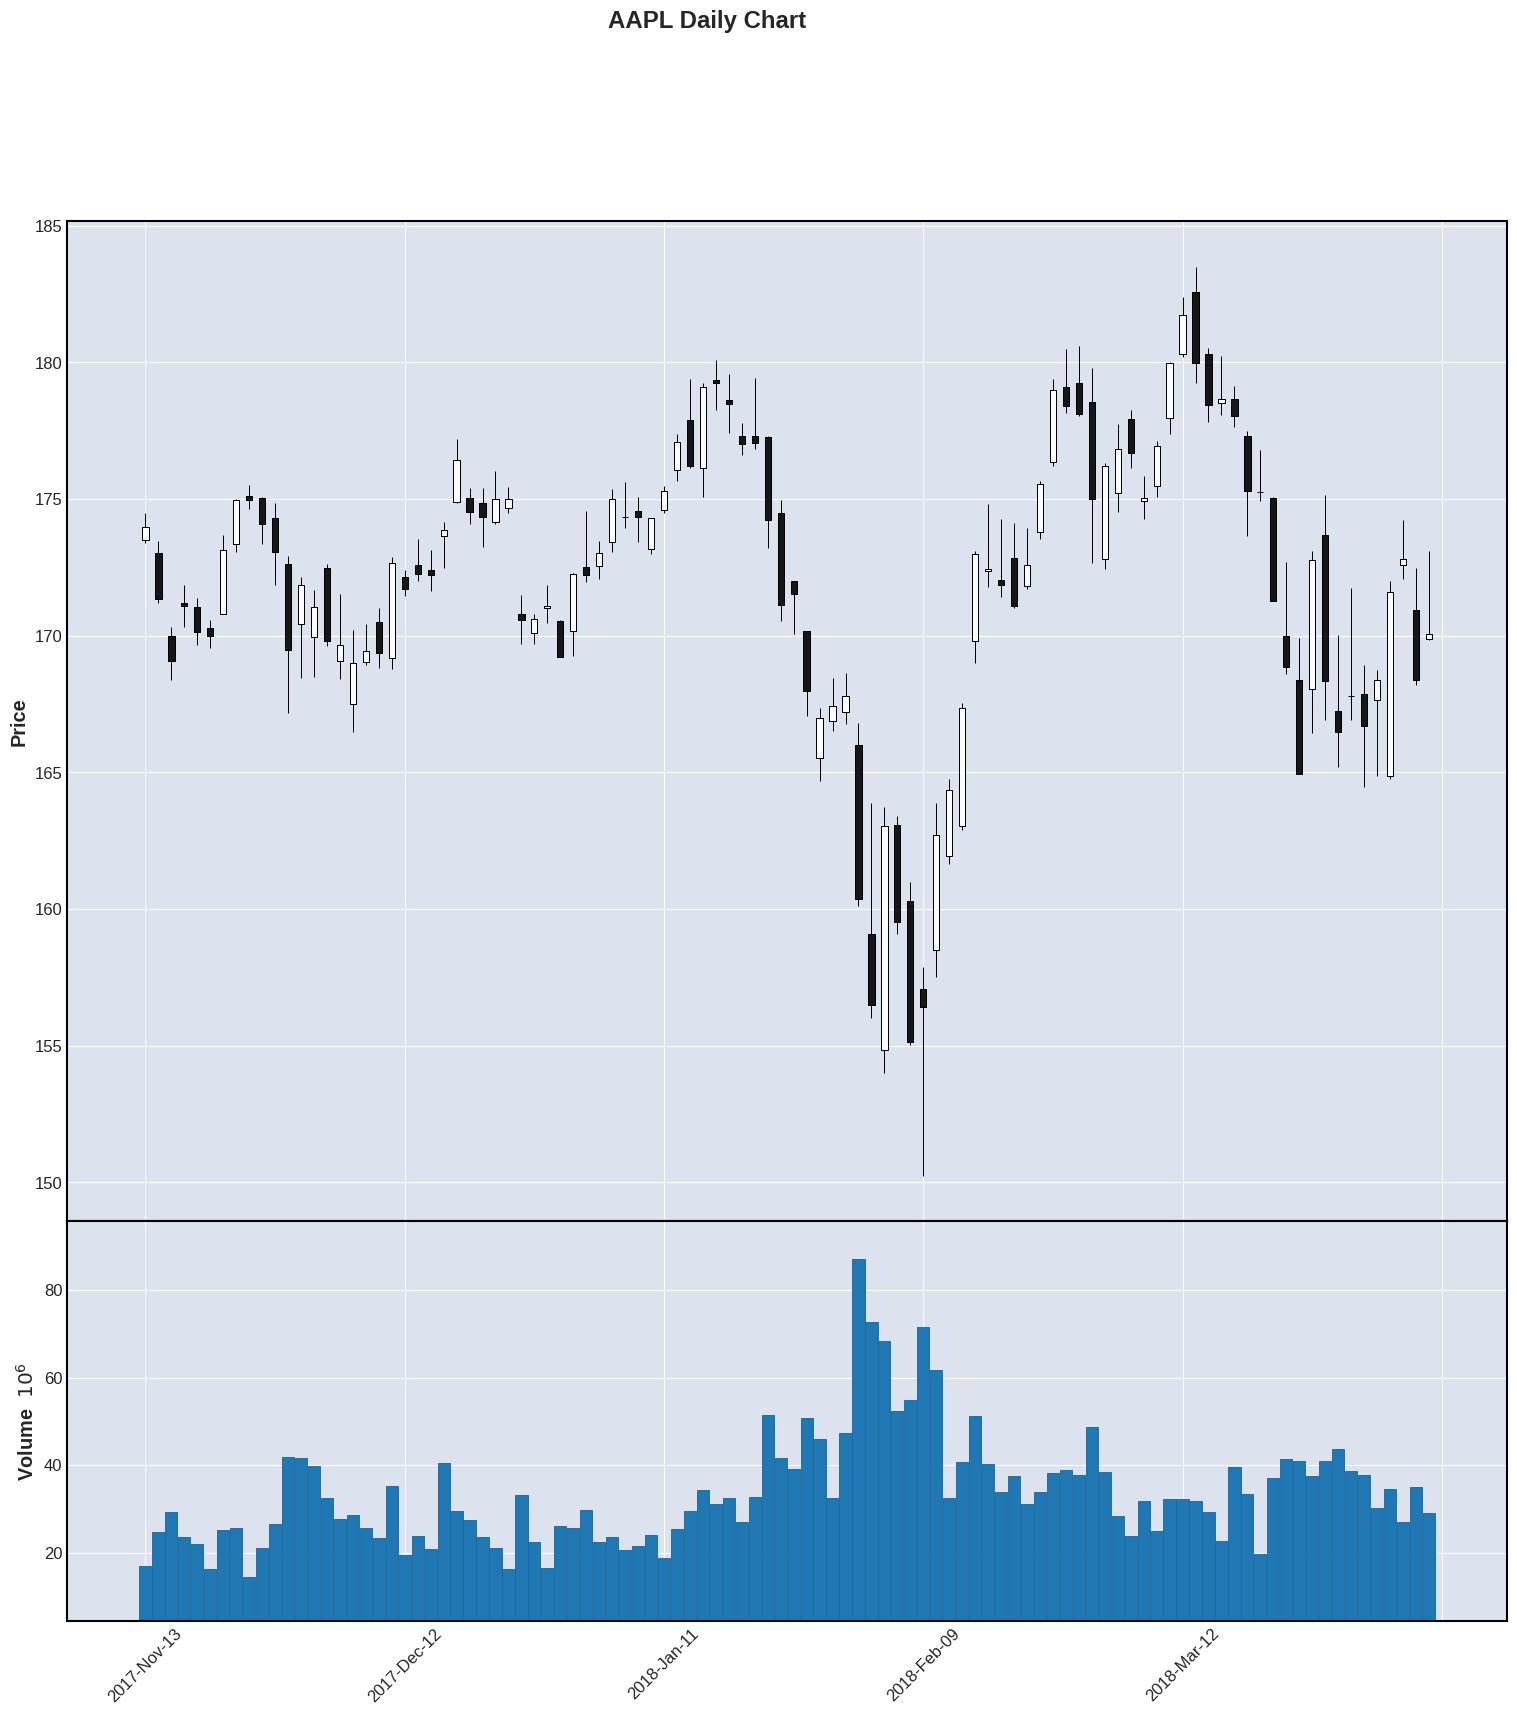

In [489]:
mpf.plot(aapl1[:subset], type='candle',volume=True,figsize=(20,20),title="AAPL Daily Chart")

In [490]:
aapl.head()

,timestamp,open,high,low,close,volume,trade_count,vwap
0,2017-11-13 05:00:00+00:00,173.51,174.5000,173.40,173.97,17009480.0,113812.0,174.031218
1,2017-11-14 05:00:00+00:00,173.04,173.4800,171.18,171.34,24782946.0,154293.0,172.233234
2,2017-11-15 05:00:00+00:00,169.97,170.3197,168.38,169.08,29288515.0,175240.0,169.358127
3,2017-11-16 05:00:00+00:00,171.18,171.8700,170.30,171.10,23638473.0,133303.0,171.193524
4,2017-11-17 05:00:00+00:00,171.04,171.3900,169.64,170.15,21900015.0,130140.0,170.393943


In [491]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    1278 non-null   object 
 1   open         1278 non-null   float64
 2   high         1278 non-null   float64
 3   low          1278 non-null   float64
 4   close        1278 non-null   float64
 5   volume       1278 non-null   float64
 6   trade_count  1278 non-null   float64
 7   vwap         1278 non-null   float64
dtypes: float64(7), object(1)
memory usage: 80.0+ KB


In [492]:
aapl.describe()

,open,high,low,close,volume,trade_count,vwap
count,1278.000000,1278.000000,1278.000000,1278.000000,1.278000e+03,1.278000e+03,1278.000000
mean,190.607736,192.857570,188.557963,190.817231,6.147023e+07,4.753696e+05,190.806716
std,68.061708,68.978599,67.368618,68.348094,4.072200e+07,3.223708e+05,68.257674
min,104.540000,110.190000,103.100000,106.840000,1.136204e+07,6.484700e+04,106.937323
25%,146.432500,148.462500,145.270000,146.830000,2.848617e+07,2.117808e+05,146.776445
50%,172.200000,173.851600,170.765000,172.265000,5.118855e+07,4.177550e+05,172.362453
75%,209.137500,210.532500,207.192500,208.877500,8.472813e+07,6.502940e+05,208.627963
max,514.790000,515.140000,500.330000,506.090000,3.326318e+08,2.967063e+06,505.285214


In [493]:
aapl.set_index('timestamp', inplace=True)

In [494]:
aapl = aapl.drop(['trade_count','vwap'], axis=1)

In [495]:
aapl.head()

,open,high,low,close,volume
timestamp,,,,,
2017-11-13 05:00:00+00:00,173.51,174.5000,173.40,173.97,17009480.0
2017-11-14 05:00:00+00:00,173.04,173.4800,171.18,171.34,24782946.0
2017-11-15 05:00:00+00:00,169.97,170.3197,168.38,169.08,29288515.0
2017-11-16 05:00:00+00:00,171.18,171.8700,170.30,171.10,23638473.0
2017-11-17 05:00:00+00:00,171.04,171.3900,169.64,170.15,21900015.0


In [496]:
import sklearn

Lags is an important element of time series analysis. Basically, in order to show time dependency in the machine learning model, a time-shifted column will be passed as a feature column. The amount of time-shifted columns passed as a feature is the number of lags.

In [497]:
lags = 3
cols = []
features = ['open', 'high', 'low', 'close']
for i in features:
    for lag in range(1, lags +1):
        col = '{}_lag{}'.format(i,lag)
        aapl[col] = aapl[i].shift(lag)
        cols.append(col)
aapl.dropna(inplace=True)

In [498]:
aapl.head()

,open,high,low,close,volume,open_lag1,open_lag2,open_lag3,high_lag1,high_lag2,high_lag3,low_lag1,low_lag2,low_lag3,close_lag1,close_lag2,close_lag3
timestamp,,,,,,,,,,,,,,,,,
2017-11-16 05:00:00+00:00,171.18,171.87,170.30,171.10,23638473.0,169.97,173.04,173.51,170.3197,173.4800,174.5000,168.38,171.18,173.40,169.08,171.34,173.97
2017-11-17 05:00:00+00:00,171.04,171.39,169.64,170.15,21900015.0,171.18,169.97,173.04,171.8700,170.3197,173.4800,170.30,168.38,171.18,171.10,169.08,171.34
2017-11-20 05:00:00+00:00,170.29,170.56,169.56,169.98,16262789.0,171.04,171.18,169.97,171.3900,171.8700,170.3197,169.64,170.30,168.38,170.15,171.10,169.08
2017-11-21 05:00:00+00:00,170.78,173.70,170.78,173.14,25131295.0,170.29,171.04,171.18,170.5600,171.3900,171.8700,169.56,169.64,170.30,169.98,170.15,171.10
2017-11-22 05:00:00+00:00,173.36,175.00,173.05,174.96,25589080.0,170.78,170.29,171.04,173.7000,170.5600,171.3900,170.78,169.56,169.64,173.14,169.98,170.15


The target value is the standardized return value of the stock

In [499]:
# Train test split
from sklearn.model_selection import train_test_split
train = int(np.floor(aapl.shape[0]*0.8))
df_open = aapl['open'][train:] # original test data set.
aapl['open'] = np.log(aapl['open']/aapl['open'].shift(1))
aapl.dropna(inplace=True)
# train_set, test_set = train_test_split(aapl, test_size=0.2)

train_set = aapl[:train]
test_set = aapl[train:]
train_set_y = train_set['open']
test_set_y = test_set['open']
train_set = train_set.drop(['open','high','low','close'], axis=1)
test_set = test_set.drop(['open','high','low','close'], axis=1)


Framed as a Prediction Problem, one can use Linear Regression.

In [500]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
lm = linear_model.LinearRegression()
lm.fit(train_set,np.sign(train_set_y))
prediction = lm.predict(test_set)
# helper function to return the mae and mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

def metrics(labels,predictions):
    model_mse = mean_squared_error(labels, predictions)
    model_mae = mean_absolute_error(labels, predictions)
    return model_mse, model_mae

metrics(np.sign(test_set_y),prediction)

(0.6193797749281339, 0.7102955334807621)

Text(0.5, 1.0, 'AAPL Daily Chart with Linear Regression Prediction')

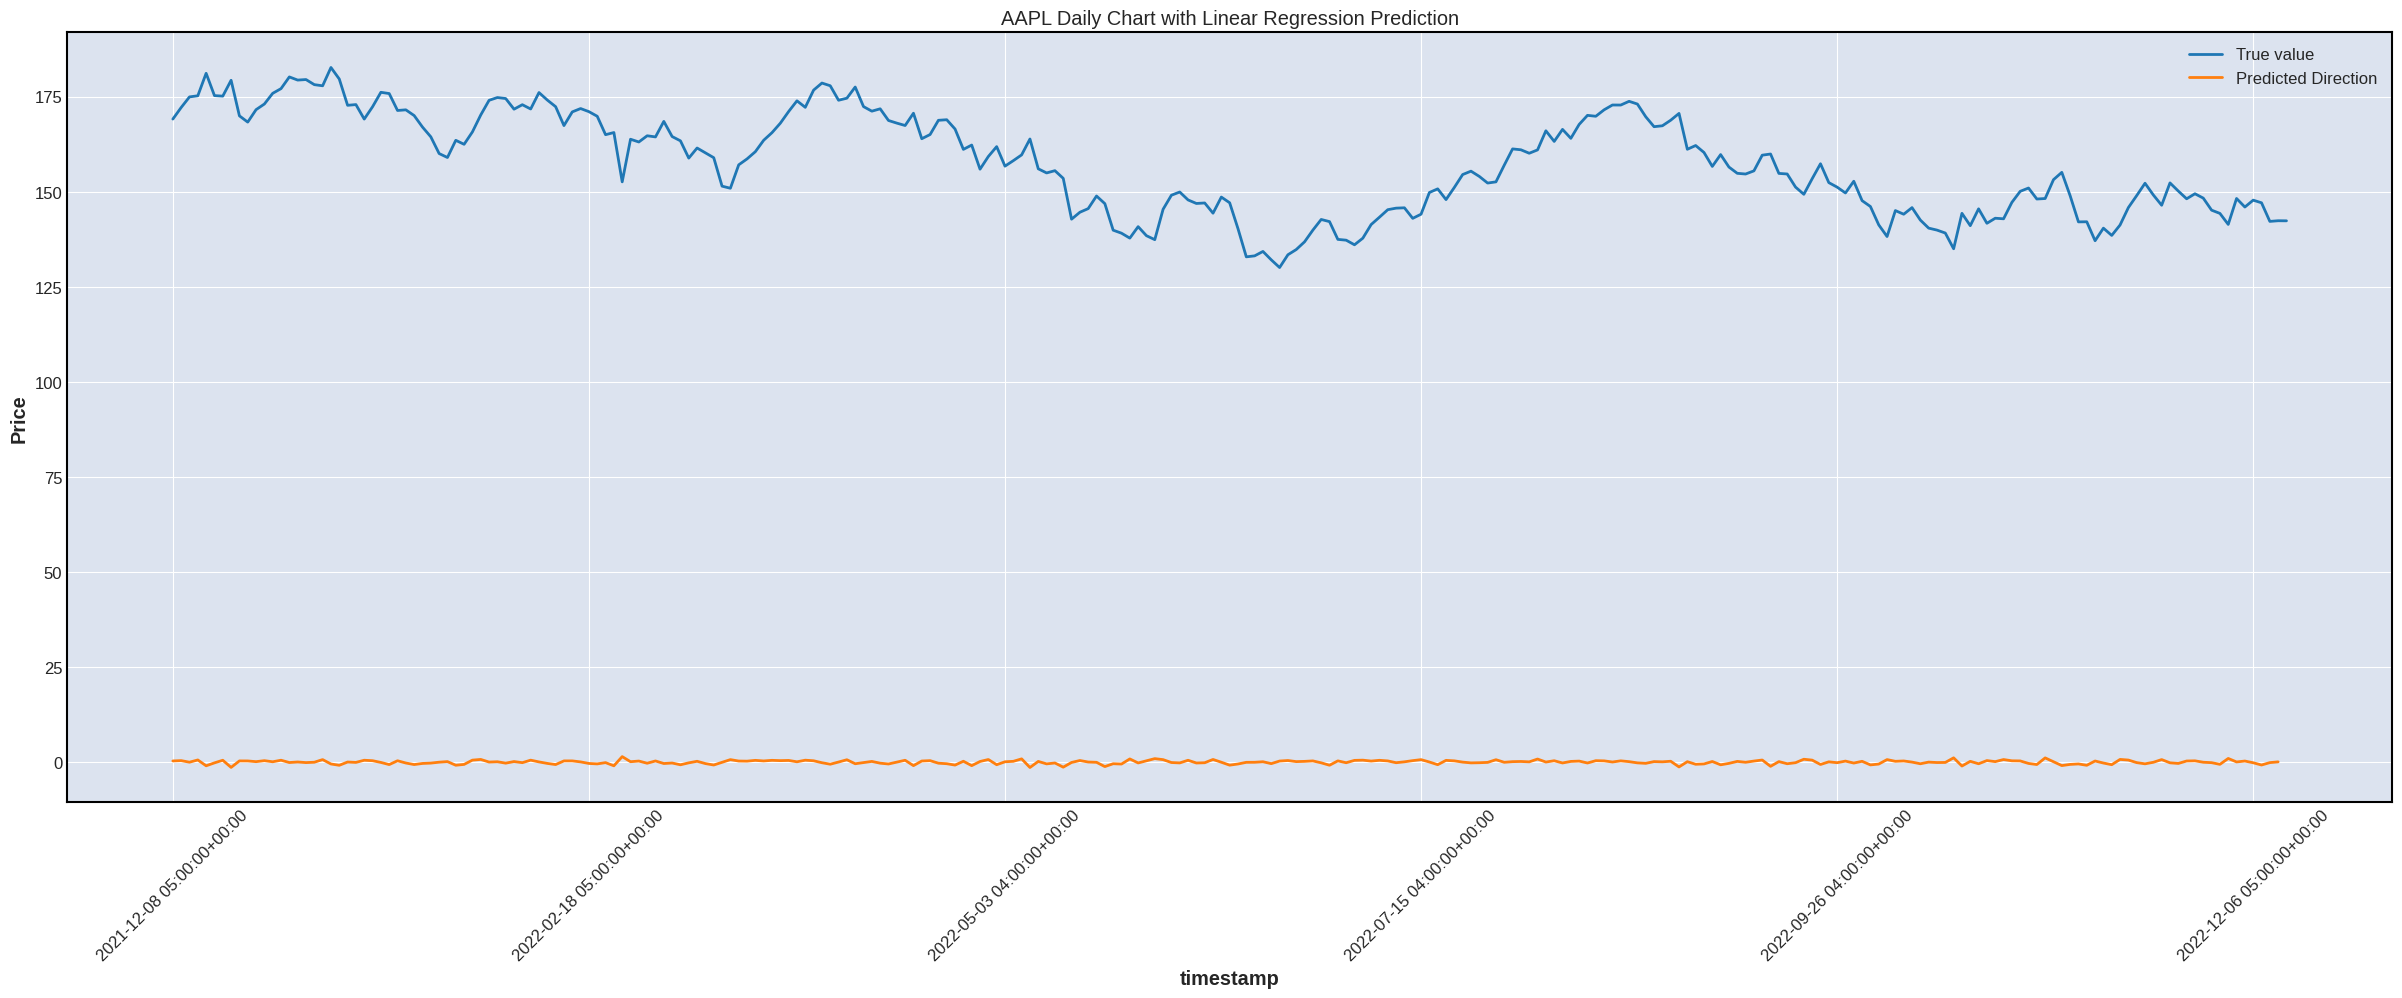

In [501]:
view = pd.DataFrame(prediction, index=df_open.index[1:])#, index=df_open.index)
plt.figure(figsize=(30,10))
ax = df_open.plot()
view.plot(ax=ax)
ax.legend(['True value','Predicted Direction'])
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.title('AAPL Daily Chart with Linear Regression Prediction')

As a classfication problem one can use logistic regression, and predict the direction of the stock, (up or down)

In [502]:
import numpy as np

In [503]:
logistic = linear_model.LogisticRegression(C=137,solver='lbfgs',multi_class='auto',max_iter=1000)
logistic.fit(train_set,np.sign(train_set_y))
prediction = logistic.predict(test_set)

In [504]:
accuracy_score(prediction, np.sign(test_set_y))

0.49606299212598426

Text(0.5, 1.0, 'AAPL Daily Chart Logistic Regression Prediction')

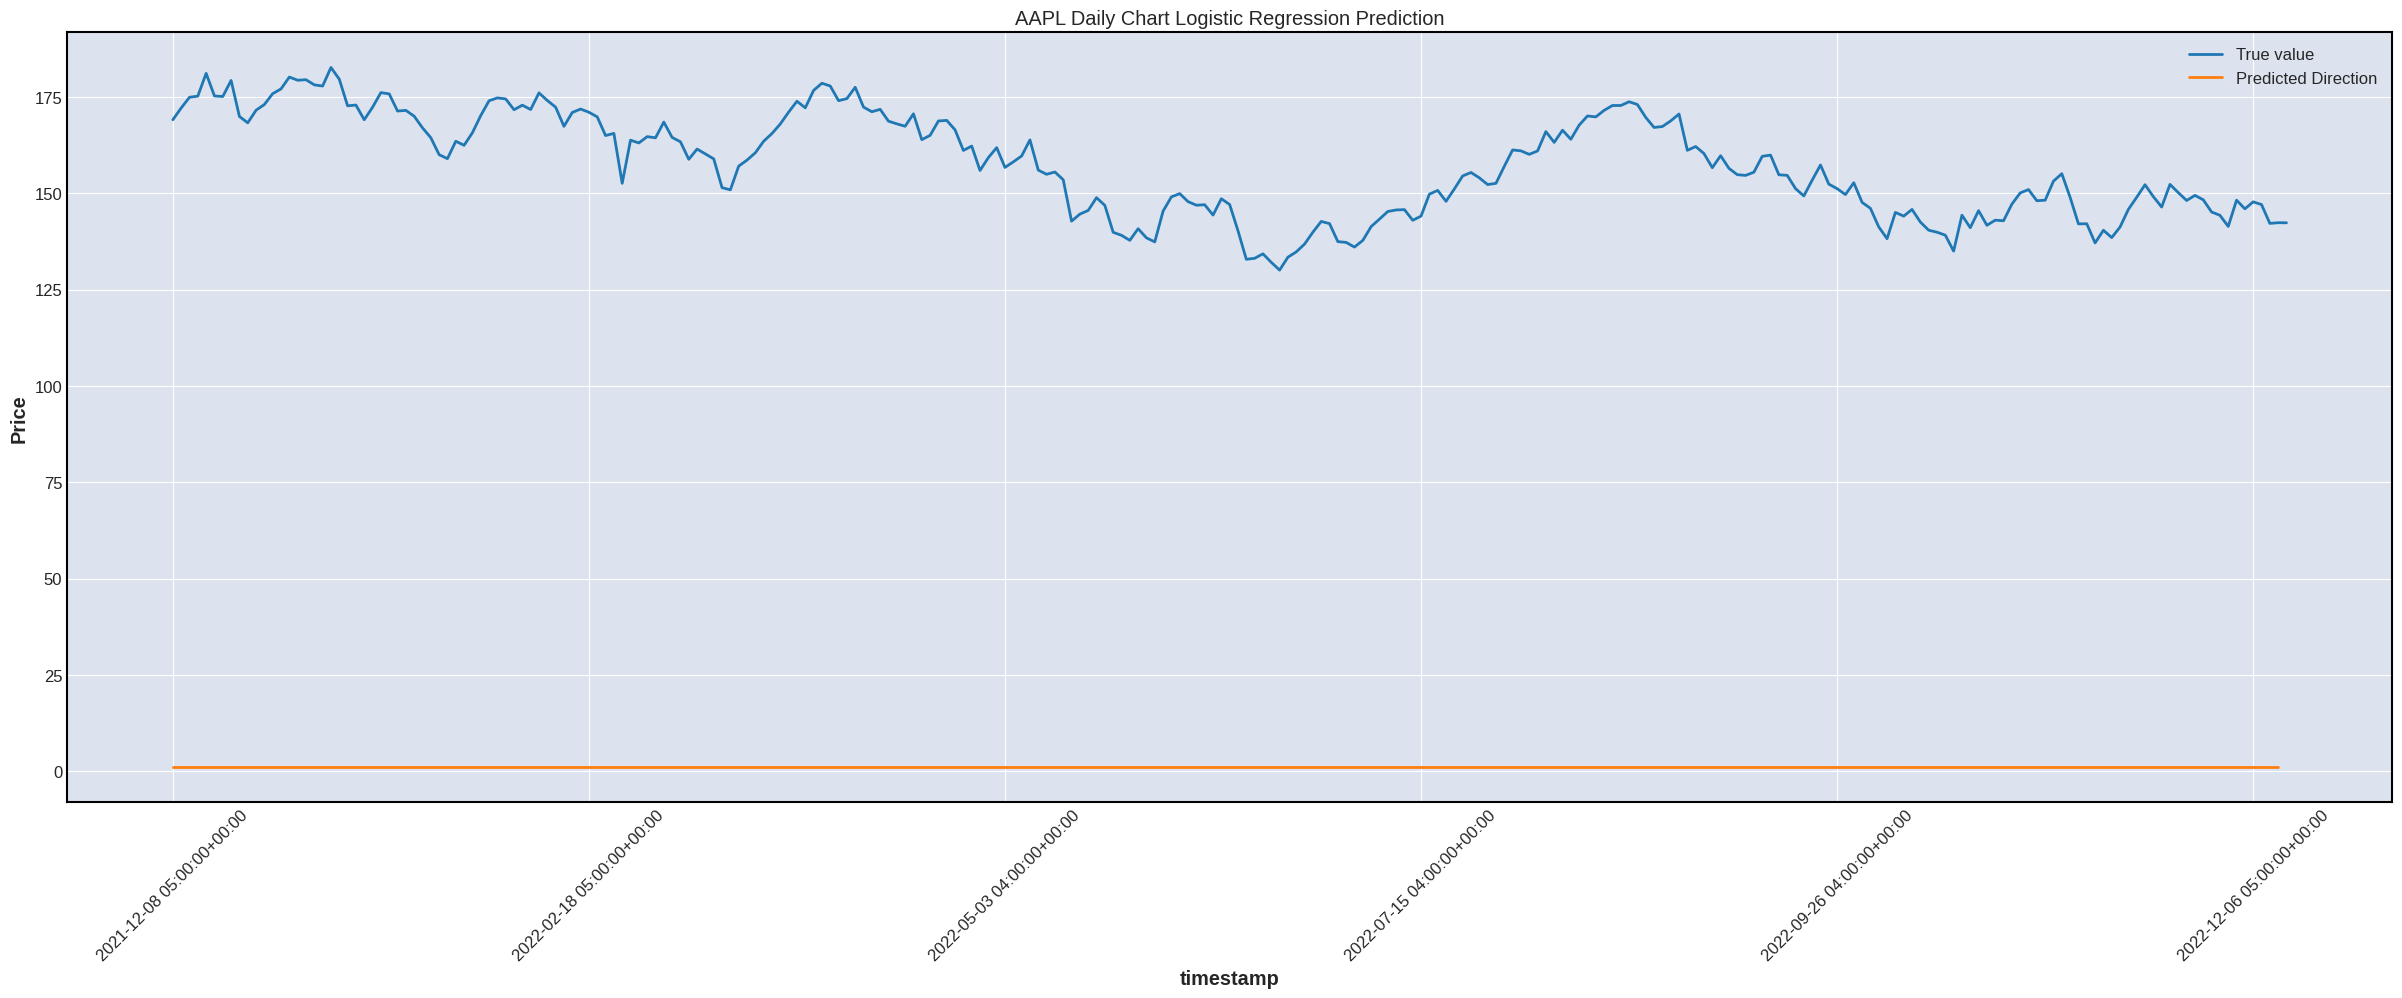

In [505]:
view = pd.DataFrame(prediction, index=df_open.index[1:])#, index=df_open.index)
plt.figure(figsize=(30,10))
ax = df_open.plot()
view.plot(ax=ax)
ax.legend(['True value','Predicted Direction'])
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.title('AAPL Daily Chart Logistic Regression Prediction')

Using Support Vector Machines

In [506]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly_clf = make_pipeline(StandardScaler(), SVC(kernel='poly',degree=3, coef0=1, C=5))

poly_clf.fit(train_set, np.sign(train_set_y))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [507]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(poly_clf, test_set, np.sign(test_set_y), cv=3)

In [508]:
accuracy_score(y_pred,np.sign(test_set_y))

0.6929133858267716

Text(0.5, 1.0, 'AAPL Daily Chart Support Vector Machine Prediction')

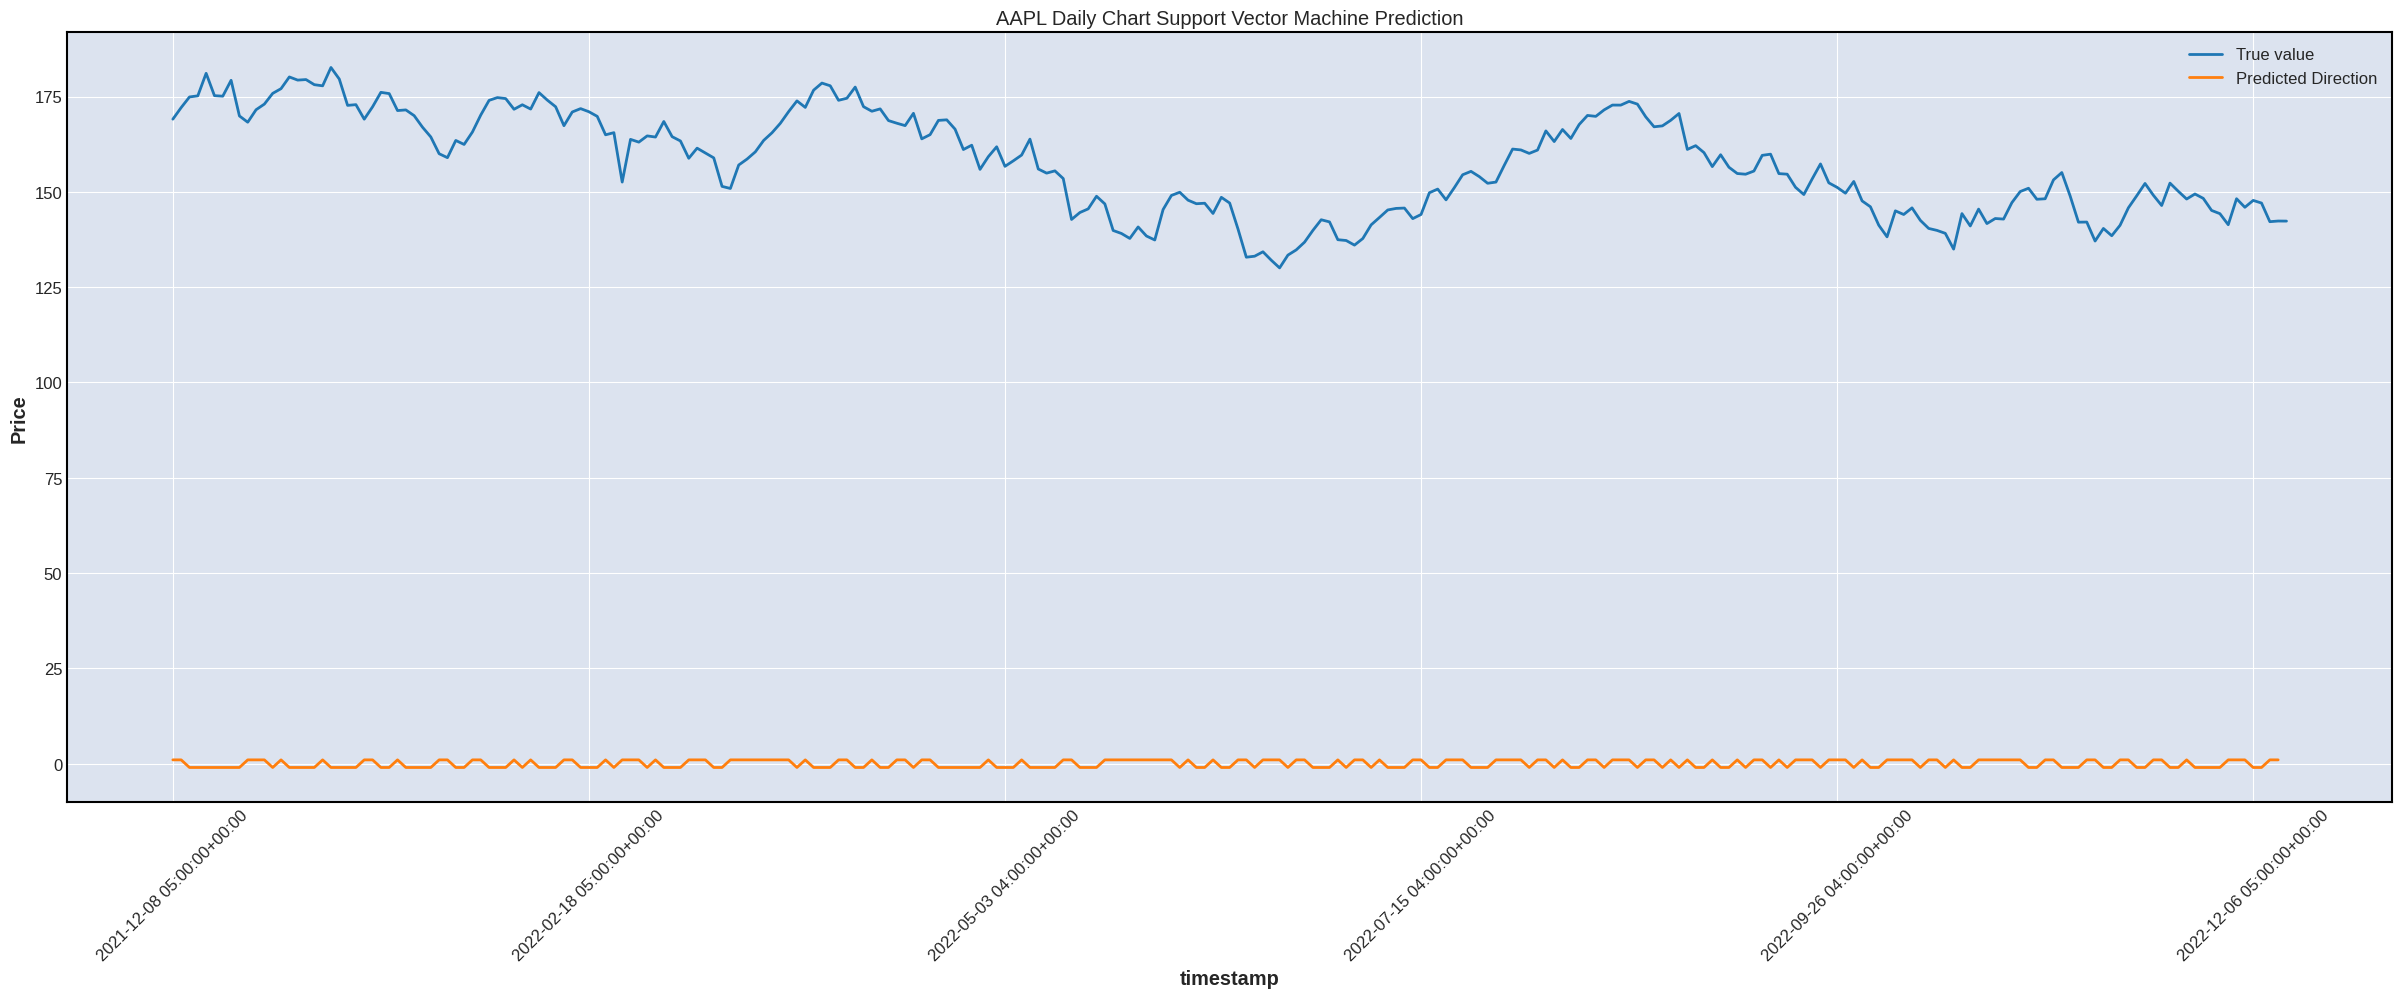

In [509]:
view = pd.DataFrame(y_pred, index=df_open.index[1:])#, index=df_open.index)
plt.figure(figsize=(30,10))
ax = df_open.plot()
view.plot(ax=ax)
ax.legend(['True value','Predicted Direction'])
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.title('AAPL Daily Chart Support Vector Machine Prediction')